Ames Housing Dataset
// Top level overview of domain "House Prices in USA"

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde
from numpy import linspace,hstack
from pylab import plot,show,hist
from functools import partialmethod



In [2]:
# "path/to/dataset"
os.chdir("/home/rizvashi/Reali_HomeAssigment/Location_Price_DataAnalysis/")
matplotlib.style.use('ggplot') # picture lib
%matplotlib inline
matplotlib.style.use('seaborn-deep')

In [3]:
AH = pd.read_csv('AmesHousing.txt', sep="\t", header = 0, index_col=False)
pd.DataFrame.head = partialmethod(pd.DataFrame.head, n=3) # set number of rows in view

In [4]:
AH.head()

Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0        0       5    2010       WD           Normal     215000  
1        0       6    2010       WD           Normal     105000  
2    12500       6    2010       WD           Normal     172000  

[3 rows x 82 columns]

In [5]:
print(AH.shape) # the table shape
#print(len(AH)) # show number of rows

(2930, 82)


In [6]:
AH.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

In [7]:
 #Descriptive statistics are brief descriptive coefficients all numerical (discrete and continuous), categorical, and ordinal
 AH.describe(include='all')   

Order           PID  MS SubClass MS Zoning  Lot Frontage  \
count   2930.00000  2.930000e+03  2930.000000      2930   2440.000000   
unique         NaN           NaN          NaN         7           NaN   
top            NaN           NaN          NaN        RL           NaN   
freq           NaN           NaN          NaN      2273           NaN   
mean    1465.50000  7.144645e+08    57.387372       NaN     69.224590   
std      845.96247  1.887308e+08    42.638025       NaN     23.365335   
min        1.00000  5.263011e+08    20.000000       NaN     21.000000   
25%      733.25000  5.284770e+08    20.000000       NaN     58.000000   
50%     1465.50000  5.354536e+08    50.000000       NaN     68.000000   
75%     2197.75000  9.071811e+08    70.000000       NaN     80.000000   
max     2930.00000  1.007100e+09   190.000000       NaN    313.000000   

             Lot Area Street Alley Lot Shape Land Contour  ...    Pool Area  \
count     2930.000000   2930   198      2930         2930  ...  2930.000000   
unique            NaN      2     2         4            4  ...          NaN   
top               NaN   Pave  Grvl       Reg          Lvl  ...          NaN   
freq              NaN   2918   120      1859         2633  ...          NaN   
mean     10147.921843    NaN   NaN       NaN          NaN  ...     2.243345   
std       7880.017759    NaN   NaN       NaN          NaN  ...    35.597181   
min       1300.000000    NaN   NaN       NaN          NaN  ...     0.000000   
25%       7440.250000    NaN   NaN       NaN          NaN  ...     0.000000   
50%       9436.500000    NaN   NaN       NaN          NaN  ...     0.000000   
75%      11555.250000    NaN   NaN       NaN          NaN  ...     0.000000   
max     215245.000000    NaN   NaN       NaN          NaN  ...   800.000000   

       Pool QC  Fence Misc Feature      Misc Val      Mo Sold      Yr Sold  \
count       13    572          106   2930.000000  2930.000000  2930.000000   
unique       4      4            5           NaN          NaN          NaN   
top         Ex  MnPrv         Shed           NaN          NaN          NaN   
freq         4    330           95           NaN          NaN          NaN   
mean       NaN    NaN          NaN     50.635154     6.216041  2007.790444   
std        NaN    NaN          NaN    566.344288     2.714492     1.316613   
min        NaN    NaN          NaN      0.000000     1.000000  2006.000000   
25%        NaN    NaN          NaN      0.000000     4.000000  2007.000000   
50%        NaN    NaN          NaN      0.000000     6.000000  2008.000000   
75%        NaN    NaN          NaN      0.000000     8.000000  2009.000000   
max        NaN    NaN          NaN  17000.000000    12.000000  2010.000000   

       Sale Type  Sale Condition      SalePrice  
count       2930            2930    2930.000000  
unique        10               6            NaN  
top          WD           Normal            NaN  
freq        2536            2413            NaN  
mean         NaN             NaN  180796.060068  
std          NaN             NaN   79886.692357  
min          NaN             NaN   12789.000000  
25%          NaN             NaN  129500.000000  
50%          NaN             NaN  160000.000000  
75%          NaN             NaN  213500.000000  
max          NaN             NaN  755000.000000  

[11 rows x 82 columns]

In [8]:
AH.describe()   

Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    179.112611   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1954.000000     1965.000000      0.000000   
50%        6.000000      5.000000  1973.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    164.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       ...  Wood Deck SF  Open Porch SF  Enclosed Porch   3Ssn Porch  \
count  ...   2930.000000    2930.000000     2930.000000  2930.000000   
mean   ...     93.751877      47.533447       23.011604     2.592491   
std    ...    126.361562      67.483400       64.139059    25.141331   
min    ...      0.000000       0.000000        0.000000     0.000000   
25%    ...      0.000000       0.000000        0.000000     0.000000   
50%    ...      0.000000      27.000000        0.000000     0.000000   
75%    ...    168.000000      70.000000        0.000000     0.000000   
max    ...   1424.000000     742.000000     1012.000000   508.000000   

       Screen Porch    Pool Area      Misc Val      Mo Sold      Yr Sold  \
count   2930.000000  2930.000000   2930.000000  2930.000000  2930.000000   
mean      16.002048     2.243345     50.635154     6.216041  2007.790444   
std       56.087370    35.597181    566.344288     2.714492     1.316613   
min        0.000000     0.000000      0.000000     1.000000  2006.000000   
25%        0.000000     0.000000      0.000000     4.000000  2007.000000   
50%        0.000000     0.000000      0.000000     6.000000  2008.000000   
75%        0.000000     0.000000      0.000000     8.000000  2009.000000   
max      576.000000   800.000000  17000.000000    12.000000  2010.000000   

           SalePrice  
count    2930.000000  
mean   180796.060068  
std     79886.692357  
min     12789.000000  
25%    129500.000000  
50%    160000.000000  
75%    213500.000000  
max    755000.000000  

[8 rows x 39 columns]

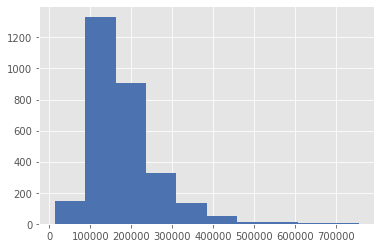

In [9]:
 # Histograms use case: looking for 'outliers' and 'extremes' in data set.
AH['SalePrice'].hist();

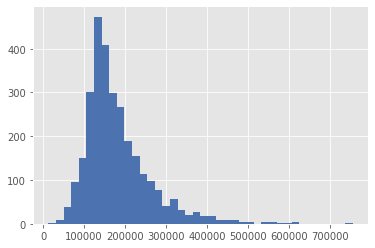

In [10]:
AH['SalePrice'].hist(bins=40); # - divides the values within a numerical variable into “bins”

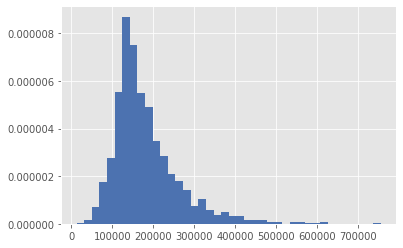

In [11]:
AH['SalePrice'].hist(bins=40, density=1); # histogram normalization

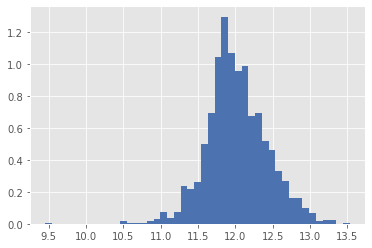

In [12]:
np.log(AH['SalePrice']).hist(bins=45, density=1); # From Price -> log(Price)

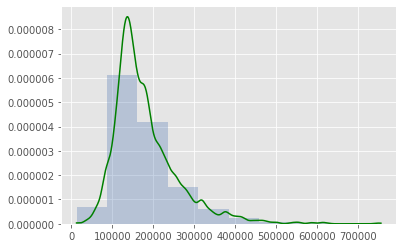

In [13]:
# Function for The Gaussian distribution 

#  my_density = gaussian_kde(AH['SalePrice'])
#  my_density = gaussian_kde(AH['SalePrice'], bw_method = 5)
#  my_density = gaussian_kde(AH['SalePrice'], bw_method = 1)
my_density = gaussian_kde(AH['SalePrice'], bw_method = 0.1)

# plot graph
x = linspace(min(AH['SalePrice']), max(AH['SalePrice']),1000)

plot(x, my_density(x),'g') # distribution function (core distribution density)
hist(AH['SalePrice'], density=1, alpha=.3) # histogram
show()

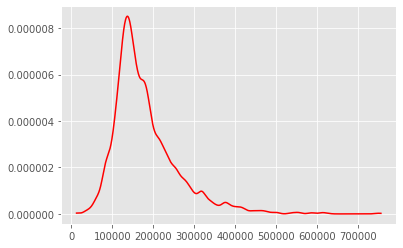

In [14]:
plot(x, my_density(x),'r') # distribution function


### Correlations (nodes) Location / Price correleitions
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density


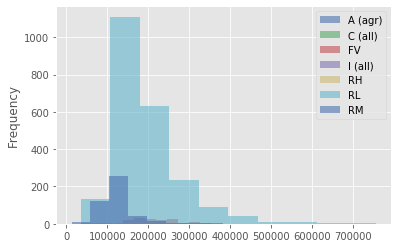

In [15]:
AH.groupby('MS Zoning')['SalePrice'].plot.hist(alpha=0.6)
plt.legend();
# Common Error! Data is not normalized.

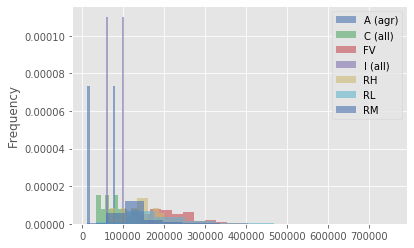

In [16]:
# data normalizetion
AH.groupby('MS Zoning')['SalePrice'].plot.hist(density=1, alpha=0.6)
plt.legend();

#### Boxplot view ( whiskers plot) Detecting outliers(o) and extremes(*). / not good enough for bimodal data

Text(0.5, 0.98, '')

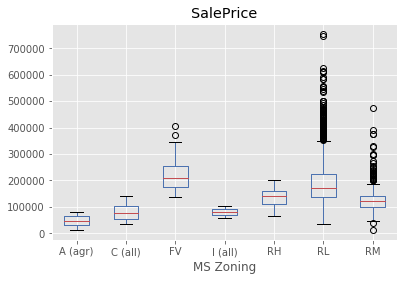

In [17]:
ax = AH.boxplot(column='SalePrice', by='MS Zoning')
ax.get_figure().suptitle('')

In [18]:
# Values control -> number of objects in each cluster of the base sample

print (AH['MS Zoning'].value_counts())

RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: MS Zoning, dtype: int64
